In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

Loading the [Codon usage Data Set](https://archive.ics.uci.edu/ml/datasets/Codon+usage).

**Attribute Information:**
<br>
Column 1: Kingdom<br>
Column 2: DNAtype<br>
Column 3: SpeciesID<br>
Column 4: Ncodons<br>
Column 5: SpeciesName<br>
Columns 6-69: codon (header: nucleotide bases; entries: frequency of usage (5 digit floating point number))

In [2]:
df = pd.read_csv('data/codon_usage.csv')
df

/home/elisio/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


Our objective is to use PCA to reduce the number of features.
<br>
The first step to achieve this is to separate the codons as features in a dataframe.

In [3]:
df_codons = df.drop(columns=['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName'])
df_codons

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,0.03555,0.01459,0.03920,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,0.01258,0.03096,0.06386,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,0.01068,0.02728,0.06643,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,0.03964,0.01600,0.02082,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [4]:
df_codons.dtypes

UUU     object
UUC     object
UUA    float64
UUG    float64
CUU    float64
        ...   
GAA    float64
GAG    float64
UAA    float64
UAG    float64
UGA    float64
Length: 64, dtype: object

The rows 486 and 5063 have a string in the features UUC and UUU respectively. Therefore, they'll be removed from the dataframe.

In [5]:
df_codons.drop([486, 5063], inplace=True)

Then we center and scale the data. That way for each codon the mean is 0 and the standard deviation is 1.

In [6]:
df_scaled = preprocessing.scale(df_codons)

Finally, run PCA. The number of components chosen, 5, is arbitrary.

In [7]:
pca = PCA(n_components=5)

In [8]:
pca.fit(df_scaled)

PCA(n_components=5)

The variance explained by each of the 5 components is displayed below.

In [9]:
pca.explained_variance_ratio_

array([0.29827912, 0.18617401, 0.05583469, 0.04051804, 0.03447397])

The variance explained by the sum of the 5 components is 61.5% as can be seen below.
<br>
The number of components can be increased in order to increase the explained variance.

In [10]:
np.sum(pca.explained_variance_ratio_)

0.6152798228293022

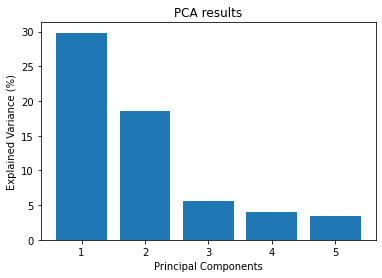

In [11]:
pca_comp = pca.explained_variance_ratio_ * 100
pca_comp = np.round(pca_comp, decimals=2)

plt.bar(x=range(1, len(pca_comp)+1), height=pca_comp)
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
plt.title('PCA results')
plt.show()

In [12]:
%load_ext watermark
%watermark -iv -v -nuw

Last updated: Sat Aug 14 2021

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

sklearn   : 0.24.2
numpy     : 1.18.5
matplotlib: 3.4.2
pandas    : 1.2.4

Watermark: 2.1.0

